In [7]:
pip install EEGRAPH

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached EEGRAPH-0.1.17-py3-none-any.whl (29 kB)
  Using cached numpy-1.21.1.zip (10.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached mne-1.2.0-py3-none-any.whl (7.6 MB)
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached plotly-5.18.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached scot-0.2.1-py2.py3-none-any.whl (57 kB)
  Using cached antropy-0.1.6-py3-none-any.whl
  Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl (65.9 MB)
  Using cached numba-0.58.1-cp310-cp310-win_amd64.whl.metadata (2.8 kB)
  Using ca

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [279 lines of output]
  setup.py:63: RuntimeWarning: NumPy 1.21.1 may not yet support Python 3.10.
    warnings.warn(
  Running from numpy source directory.
  Processing numpy/random\_bounded_integers.pxd.in
  Processing numpy/random\bit_generator.pyx
  Processing numpy/random\mtrand.pyx
  Processing numpy/random\_bounded_integers.pyx.in
  Processing numpy/random\_common.pyx
  Processing numpy/random\_generator.pyx
  Processing numpy/random\_mt19937.pyx
  Processing numpy/random\_pcg64.pyx
  Processing numpy/random\_philox.pyx
  Processing numpy/random\_sfc64.pyx
  Cythonizing sources
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:\\Program Files\\Python310\\lib', 'C:\\', 'C:\\Program Files\\Python310\\libs']
    NOT AVAILABLE
  
  blis_info:
    libraries blis not found in ['C:\\Progra

In [13]:
import os
import tarfile
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
from mne import Epochs, find_events
import mne
from mne_connectivity import spectral_connectivity_epochs
import glob
#import eegraph

from mne import find_events
os.chdir('../..')
os.getcwd()
sys.path.append('c:/users/pesylvestre/appdata/roaming/python/python310/site-packages')

SyntaxError: invalid syntax (2758522645.py, line 19)

In [3]:
def eeg_to_epoch(path, event_id=dict(T=1), tmin=-0.2, tmax=0.8, picks='eeg'):
    #need a .vhdr
    
    with open(path, 'r') as file:
        filedata = file.read()
    filedata = filedata.replace(filedata[filedata.find("DataFile=")+len("DataFile="):
                                         filedata.find(".eeg")+1],
                                path.split("/")[-1].replace("vhdr", ""))
    with open(path, 'w') as file:
        file.write(filedata)
    raw = mne.io.read_raw_brainvision(path)
    #->
    raw.drop_channels("VEOG")
    montage = mne.channels.make_standard_montage("easycap-M1")
    print(montage)
    montage.plot()
    raw.set_montage(montage)
    #->
    raw.plot()
    raw.load_data()
    filt_raw = raw.copy().filter(0.1, 30, picks='eeg', method='iir', 
                             iir_params=dict(order=8, ftype='butter'), 
                             verbose=True)
    events = mne.events_from_annotations(filt_raw)
    epochs = mne.Epochs(filt_raw, events[0], event_id, tmin, tmax, 
                    picks=picks, baseline=(-0.2, 0), reject=None, preload=True)
    return epochs, events[0], events[1], raw, filt_raw

In [4]:
def tar_to_epoch(path, event_id=dict(T=1), tmin=-0.2, tmax=0.8, picks='eeg'):
    tar = tarfile.open(path)
    d = tar.getnames()
    print("->",os.getcwd())
    #print('/'.join(path.split("/")[0:-1]))
    tar.extractall(path='/'.join(path.split("/")[0:-1]))
    tar.close()
    print(d)
    return eeg_to_epoch(path.replace(d[0]+".tar.gz", '')+"\n".join(s for s in d if "vhdr" in s), event_id, tmin, tmax, picks)

-> D:\Utilisateur\SPierre-Eloy\Documents\Informatique\Brail
['sub-032301', 'sub-032301/RSEEG', 'sub-032301/RSEEG/sub-032301.vmrk', 'sub-032301/RSEEG/sub-032301.vhdr', 'sub-032301/RSEEG/sub-032301.eeg']
Extracting parameters from D:/Utilisateur/SPierre-Eloy/Documents/Informatique/Brail/In-HousePOC3/in_housepoc3/data/sub-032301/RSEEG/sub-032301.vhdr...
Setting channel info structure...
<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 74 channels>


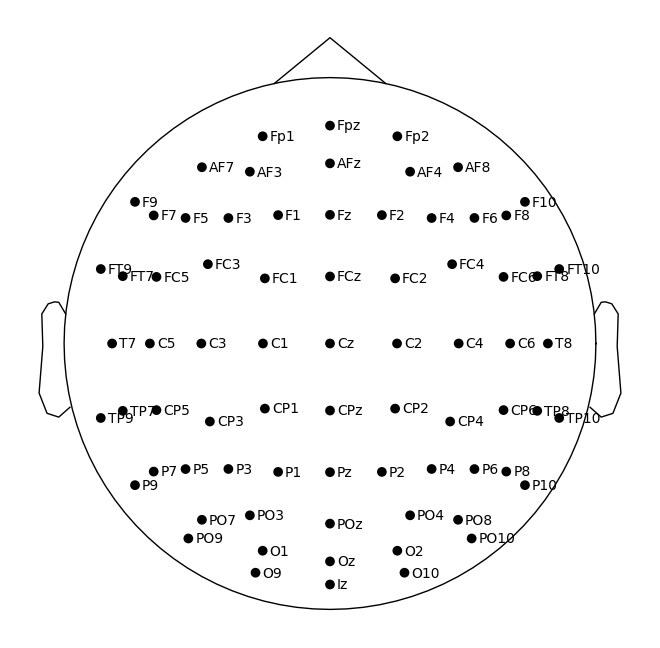

Using matplotlib as 2D backend.


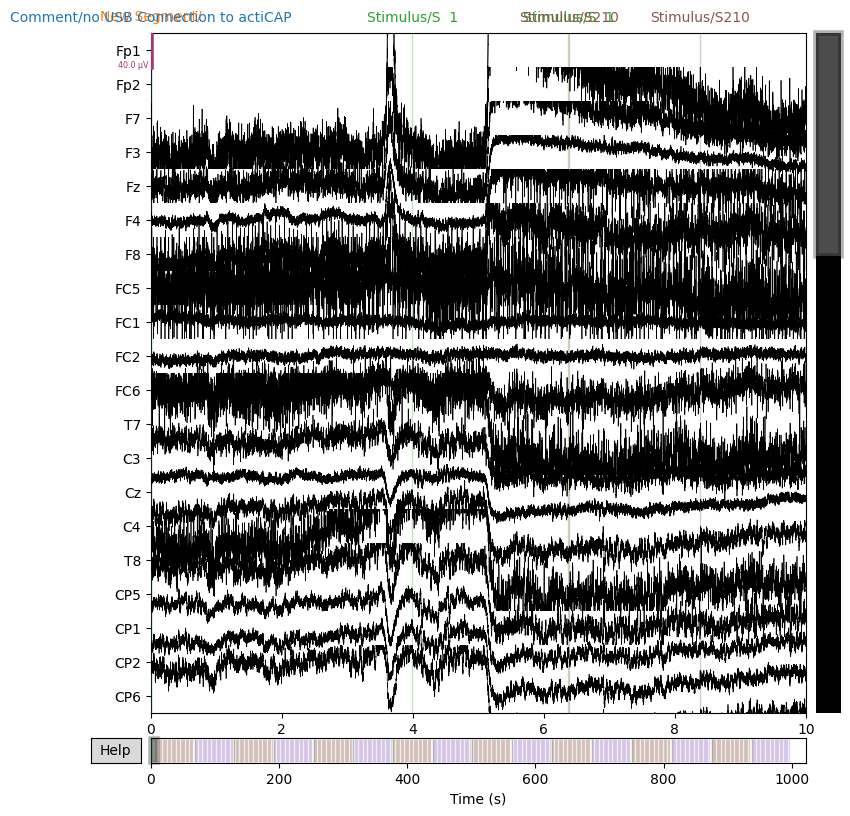

Reading 0 ... 2554999  =      0.000 ...  1022.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 32 (effective, after forward-backward)
- Cutoffs at 0.10, 30.00 Hz: -6.02, -6.02 dB

Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
Not setting metadata
480 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 480 events and 2501 original time points ...
0 bad epochs dropped


In [5]:
#Manualy download lemon data from : http://fcon_1000.projects.nitrc.org/indi/retro/MPI_LEMON/downloads/download_EEG.html
epv = tar_to_epoch("D:/Utilisateur/SPierre-Eloy/Documents/Informatique/Brail/In-HousePOC3/in_housepoc3/data/sub-032301.tar.gz", event_id=dict(eyesOpen=210, eyesClose=200))

In [6]:
res = spectral_connectivity_epochs(epv[0], fmin=9, fmax=11, faverage=True).get_data()[:, 0]
print(res)
res.shape

Adding metadata with 3 columns
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 1830 connections
    using t=-0.200s..0.800s for estimation (2501 points)
    frequencies: 10.0Hz..11.0Hz (2 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Coherence
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7
    computing connectivity for epoch 8
    computing connectivity for epoch 9
    computing connectivity for epoch 10
    computing connectivity for epoch 11
    computing connectivity for epoch 12
    computing connectivity for epoch 13
    computing connectivity for epoch 14
    computing connectivit

(3721,)